# Importing the libraries

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading Dataset

In [78]:
ds = pd.read_csv('train.csv')

In [79]:
ds

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [80]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [81]:
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
ds.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
ds.shape

(891, 12)

In [84]:
ds['Fare'].nunique()

248

## Data Preprocessing

In [85]:
nominal_cols = ['Embarked','Pclass','Age', 'Survived', 'Sex']
cat_cols = ['Embarked','Pclass','Age', 'Survived', 'Title']
ds['Title'] = ds.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)
ds['Embarked'].fillna('Unknown',inplace=True)
ds['Age'].fillna(0, inplace=True)

# Replacing Binary with String
rep = {0: "Dead", 1: "Survived"}
ds.replace({'Survived' : rep}, inplace=True)

In [86]:
# Binning Age Column

def binning(col, cut_points, labels=None):
  minval = col.min()
  maxval = col.max()
  break_points = [minval] + cut_points + [maxval]
  if not labels:
    labels = range(len(cut_points)+1)
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [1, 20, 50 ]
labels = ["Unknown", "Young", "Adult", "Old"]
ds['Age'] = binning(ds['Age'], cut_points, labels)
in_titanic = ds[nominal_cols]
cat_titanic = ds[cat_cols]

 Gender Data

In [87]:
in_titanic.head()

,Embarked,Pclass,Age,Survived,Sex
0,S,3,Adult,Dead,male
1,C,1,Adult,Survived,female
2,S,3,Adult,Survived,female
3,S,1,Adult,Survived,female
4,S,3,Adult,Dead,male


 Title Data

In [88]:
cat_titanic.head()

,Embarked,Pclass,Age,Survived,Title
0,S,3,Adult,Dead,Mr.
1,C,1,Adult,Survived,Mrs.
2,S,3,Adult,Survived,Miss.
3,S,1,Adult,Survived,Mrs.
4,S,3,Adult,Dead,Mr.


### Data Visualization with Plots


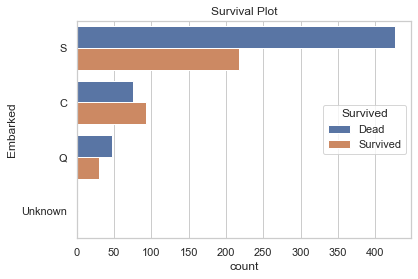

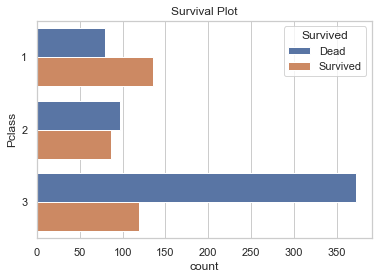

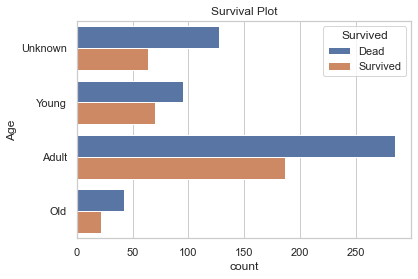

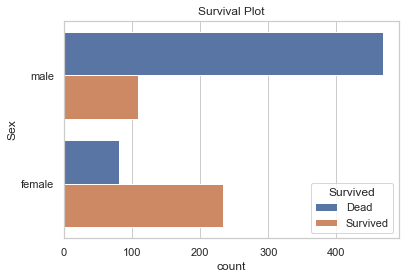

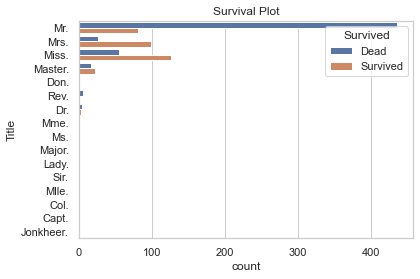

In [89]:
for x in ['Embarked', 'Pclass','Age', 'Sex', 'Title']:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="Survived", data=ds)
    plt.ylabel(x)
    plt.title('Survival Plot')
    plt.show()

# Insights From EDA:
1.People embarked from S has mre no.of survived and dead. While from Q has the least. 

2.People in Pclass 3 have more no.of dead and Pclass 1 has the least.

3.No.of adult people both survived and dead are more and, while Old are the least.

4.More male dead and more females survived.


## Analysis of  Methodology

* We are using Gender Wise data to build the model.


In [90]:
dataset = []
for i in range(0, in_titanic.shape[0]-1):
    dataset.append([str(in_titanic.values[i,j]) for j in range(0, in_titanic.shape[1])])

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

,1,2,3,Adult,C,Dead,Old,Q,S,Survived,Unknown,Young,female,male
0,False,False,True,True,False,True,False,False,True,False,False,False,False,True
1,True,False,False,True,True,False,False,False,False,True,False,False,True,False
2,False,False,True,True,False,False,False,False,True,True,False,False,True,False
3,True,False,False,True,False,False,False,False,True,True,False,False,True,False
4,False,False,True,True,False,True,False,False,True,False,False,False,False,True


In [91]:
oht.columns_

['1',
 '2',
 '3',
 'Adult',
 'C',
 'Dead',
 'Old',
 'Q',
 'S',
 'Survived',
 'Unknown',
 'Young',
 'female',
 'male']

## Building the model

In [128]:
output = apriori(df, min_support=0.02, use_colnames=oht.columns_)
rules = association_rules(output, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
862,"(Unknown, Dead, Q)",(3),0.030337,0.550562,0.030337,1.000000,1.816327,0.013635,inf
1006,"(Unknown, Q, male)",(3),0.028090,0.550562,0.028090,1.000000,1.816327,0.012625,inf
1415,"(Unknown, Q, Dead, male)",(3),0.025843,0.550562,0.025843,1.000000,1.816327,0.011615,inf
624,"(1, Dead, Old)",(male),0.023596,0.647191,0.023596,1.000000,1.545139,0.008325,inf
276,"(Unknown, Q)",(3),0.055056,0.550562,0.053933,0.979592,1.779259,0.023621,22.022472
610,"(1, female, C)",(Survived),0.048315,0.384270,0.047191,0.976744,2.541820,0.028625,26.476404
416,"(Dead, Old)",(male),0.047191,0.647191,0.046067,0.976190,1.508350,0.015526,14.817978
1136,"(S, Old, Dead)",(male),0.035955,0.647191,0.034831,0.968750,1.496853,0.011562,11.289888
140,"(1, female)",(Survived),0.105618,0.384270,0.102247,0.968085,2.519286,0.061661,19.292884
577,"(1, female, Adult)",(Survived),0.065169,0.384270,0.062921,0.965517,2.512603,0.037879,17.856180
